In [1]:
death_en = pd.read_csv('cause_of_deaths.csv')

NameError: name 'pd' is not defined

In [ ]:
len(death_en['Country/Territory'].unique())

204

In [ ]:
import requests
res = requests.get('https://www.countrycallingcodes.com/iso-country-codes/').text
text = bs(res)
list_ = []
dic = {}
text_1 = text.select('table[align=center]')[0].select('a')
for i in text_1:
    url = 'https://www.countrycallingcodes.com/iso-country-codes/%s'%i['href']
    continent_name = i.text
    text_2 = bs(requests.get(url).text)
    text_3 = text_2.select('table table table tr')[1:]
    name_list = []
    for j in text_3:
        a=j.select_one('td:nth-child(3)')
#         print(a)
        try:
            name_list.append(a.text)
        except:
            continue
# #         print(j.text)
        
    dic[continent_name] = name_list
def continent(country, dic):
    for i in range(7):
        if country in list(dic.values())[i]:
            return list(dic.keys())[i]
        else:
            pass
death_en['continent'] = death_en['Code'].apply(continent, dic = dic)
death_en

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,continent
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,3709,338,2054,4154,5945,2673,5005,323,2985,Asia
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,3724,351,2119,4472,6050,2728,5120,332,3092,Asia
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,3776,386,2404,5106,6223,2830,5335,360,3325,Asia
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,3862,425,2797,5681,6445,2943,5568,396,3601,Asia
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,3932,451,3038,6001,6664,3027,5739,420,3816,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6115,Zimbabwe,ZWE,2015,1439,754,215,3019,2518,770,1302,...,2108,381,2990,2373,2751,1956,4202,632,146,Africa
6116,Zimbabwe,ZWE,2016,1457,767,219,3056,2050,801,1342,...,2160,393,3027,2436,2788,1962,4264,648,146,Africa
6117,Zimbabwe,ZWE,2017,1460,781,223,2990,2116,818,1363,...,2196,398,2962,2473,2818,2007,4342,654,144,Africa
6118,Zimbabwe,ZWE,2018,1450,795,227,2918,2088,825,1396,...,2240,400,2890,2509,2849,2030,4377,657,139,Africa


<AxesSubplot:xlabel='continent', ylabel='count'>

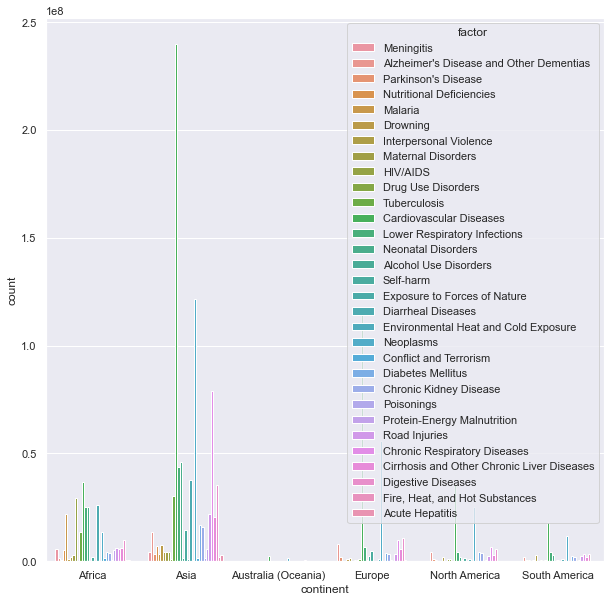

In [ ]:
death_en.groupby('continent').sum().reset_index()
melted_by_factors = pd.melt(death_en.groupby('continent').sum().reset_index(), id_vars=['continent', 'Year'],var_name='factor', value_name='count')
sns.set({'figure.figsize':(10,10)})
sns.barplot(data = melted_by_factors, x='continent', y='count', hue='factor')

In [ ]:
death_disease = death_en[['continent','Country/Territory','Code','Year',"Meningitis",
       "Alzheimer's Disease and Other Dementias", "Parkinson's Disease",'Malaria','HIV/AIDS','Tuberculosis', 'Cardiovascular Diseases','Lower Respiratory Infections','Diarrheal Diseases', 'Diabetes Mellitus', 'Chronic Kidney Disease','Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases','Acute Hepatitis']]
death_not_disease = death_en.drop(["Meningitis",
       "Alzheimer's Disease and Other Dementias", "Parkinson's Disease",'Malaria','HIV/AIDS','Tuberculosis', 'Cardiovascular Diseases','Lower Respiratory Infections','Diarrheal Diseases', 'Diabetes Mellitus', 'Chronic Kidney Disease','Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases','Acute Hepatitis'], axis =1 )

In [ ]:
not_disease_death_count = pd.melt(death_not_disease, id_vars =['continent','Country/Territory','Code','Year'])['value'].sum()
disease_death_count = pd.melt(death_disease, id_vars =['continent','Country/Territory','Code','Year'])['value'].sum()

1024647077

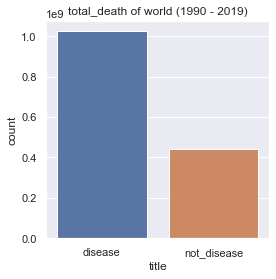

In [ ]:
# ///////////////////////////////////////////
sns.set({'figure.figsize':(4,4)})
plt.tight_layout
not_disease_death_count, disease_death_count
sep_with_disease = pd.DataFrame([['disease',disease_death_count],['not_disease',not_disease_death_count]], columns = ['title', 'count'])

bar = sns.barplot(data = sep_with_disease, x = 'title', y = 'count')
bar.set_title('total_death of world (1990 - 2019)')
disease_death_count

In [ ]:
# 질병으로 인한 죽음이 시간이 갈수록 증가하는지
# 전세계적으로 대륙별로

In [ ]:
texts = '<ul role="list" class="km-list sc-bJsHXV iLznVN"><div class="sc-LoTwT eOjOlJ mdc-list-group"><li role="listitem" class="sc-jfmDQi hfJycS"><div class="sc-eKszNL mUrGh sc-jEsDcK gXtRPK"><a class="sc-lbOyJj eeGduD"><div class="sc-olbas hkSvcu"><div class="sc-hiMGwR GvHYb"><div class="sc-ehmTmK bMKNkA"><label class="sc-haJGGt guWrfX"><input id="kaggleCheckbox" type="checkbox" role="checkbox" aria-checked="true" class="sc-gCoyRa bULiRi" tabindex="0" value="true" checked=""><span style="height: fit-content;"><svg class="checked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM13.6 4.6L15 6L7 14L3 10L4.4 8.6L7 11.2L13.6 4.6Z" fill="#202124"></path></svg><svg class="unchecked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM16 16V2H2V16H16Z" fill="#80868B"></path></svg><svg class="indeterminate" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M16 0H2C0.9 0 0 0.9 0 2V16C0 17.1 0.9 18 2 18H16C17.1 18 18 17.1 18 16V2C18 0.9 17.1 0 16 0ZM16 2V16H2V2H16ZM4 10H14V8H4V10Z" fill="#80868B"></path></svg></span></label></div></div><div class="sc-iBkjds sc-fLlhyt sc-fbPSWO uVZhN izULIq A-dENW"><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">국가/영토</font></font></div></div></a></div></li><li role="listitem" class="sc-jfmDQi hfJycS"><div class="sc-eKszNL mUrGh sc-jEsDcK gXtRPK"><a class="sc-lbOyJj eeGduD"><div class="sc-olbas hkSvcu"><div class="sc-hiMGwR GvHYb"><div class="sc-ehmTmK bMKNkA"><label class="sc-haJGGt guWrfX"><input id="kaggleCheckbox" type="checkbox" role="checkbox" aria-checked="true" class="sc-gCoyRa bULiRi" tabindex="0" value="true" checked=""><span style="height: fit-content;"><svg class="checked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM13.6 4.6L15 6L7 14L3 10L4.4 8.6L7 11.2L13.6 4.6Z" fill="#202124"></path></svg><svg class="unchecked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM16 16V2H2V16H16Z" fill="#80868B"></path></svg><svg class="indeterminate" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M16 0H2C0.9 0 0 0.9 0 2V16C0 17.1 0.9 18 2 18H16C17.1 18 18 17.1 18 16V2C18 0.9 17.1 0 16 0ZM16 2V16H2V2H16ZM4 10H14V8H4V10Z" fill="#80868B"></path></svg></span></label></div></div><div class="sc-iBkjds sc-fLlhyt sc-fbPSWO uVZhN izULIq A-dENW"><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">암호</font></font></div></div></a></div></li><li role="listitem" class="sc-jfmDQi hfJycS"><div class="sc-eKszNL mUrGh sc-jEsDcK gXtRPK"><a class="sc-lbOyJj eeGduD"><div class="sc-olbas hkSvcu"><div class="sc-hiMGwR GvHYb"><div class="sc-ehmTmK bMKNkA"><label class="sc-haJGGt guWrfX"><input id="kaggleCheckbox" type="checkbox" role="checkbox" aria-checked="true" class="sc-gCoyRa bULiRi" tabindex="0" value="true" checked=""><span style="height: fit-content;"><svg class="checked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM13.6 4.6L15 6L7 14L3 10L4.4 8.6L7 11.2L13.6 4.6Z" fill="#202124"></path></svg><svg class="unchecked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM16 16V2H2V16H16Z" fill="#80868B"></path></svg><svg class="indeterminate" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M16 0H2C0.9 0 0 0.9 0 2V16C0 17.1 0.9 18 2 18H16C17.1 18 18 17.1 18 16V2C18 0.9 17.1 0 16 0ZM16 2V16H2V2H16ZM4 10H14V8H4V10Z" fill="#80868B"></path></svg></span></label></div></div><div class="sc-iBkjds sc-fLlhyt sc-fbPSWO uVZhN izULIq A-dENW"><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">년도</font></font></div></div></a></div></li><li role="listitem" class="sc-jfmDQi hfJycS"><div class="sc-eKszNL mUrGh sc-jEsDcK gXtRPK"><a class="sc-lbOyJj eeGduD"><div class="sc-olbas hkSvcu"><div class="sc-hiMGwR GvHYb"><div class="sc-ehmTmK bMKNkA"><label class="sc-haJGGt guWrfX"><input id="kaggleCheckbox" type="checkbox" role="checkbox" aria-checked="true" class="sc-gCoyRa bULiRi" tabindex="0" value="true" checked=""><span style="height: fit-content;"><svg class="checked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM13.6 4.6L15 6L7 14L3 10L4.4 8.6L7 11.2L13.6 4.6Z" fill="#202124"></path></svg><svg class="unchecked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM16 16V2H2V16H16Z" fill="#80868B"></path></svg><svg class="indeterminate" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M16 0H2C0.9 0 0 0.9 0 2V16C0 17.1 0.9 18 2 18H16C17.1 18 18 17.1 18 16V2C18 0.9 17.1 0 16 0ZM16 2V16H2V2H16ZM4 10H14V8H4V10Z" fill="#80868B"></path></svg></span></label></div></div><div class="sc-iBkjds sc-fLlhyt sc-fbPSWO uVZhN izULIq A-dENW"><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">수막염</font></font></div></div></a></div></li><li role="listitem" class="sc-jfmDQi hfJycS"><div class="sc-eKszNL mUrGh sc-jEsDcK gXtRPK"><a class="sc-lbOyJj eeGduD"><div class="sc-olbas hkSvcu"><div class="sc-hiMGwR GvHYb"><div class="sc-ehmTmK bMKNkA"><label class="sc-haJGGt guWrfX"><input id="kaggleCheckbox" type="checkbox" role="checkbox" aria-checked="true" class="sc-gCoyRa bULiRi" tabindex="0" value="true" checked=""><span style="height: fit-content;"><svg class="checked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM13.6 4.6L15 6L7 14L3 10L4.4 8.6L7 11.2L13.6 4.6Z" fill="#202124"></path></svg><svg class="unchecked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM16 16V2H2V16H16Z" fill="#80868B"></path></svg><svg class="indeterminate" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M16 0H2C0.9 0 0 0.9 0 2V16C0 17.1 0.9 18 2 18H16C17.1 18 18 17.1 18 16V2C18 0.9 17.1 0 16 0ZM16 2V16H2V2H16ZM4 10H14V8H4V10Z" fill="#80868B"></path></svg></span></label></div></div><div class="sc-iBkjds sc-fLlhyt sc-fbPSWO uVZhN izULIq A-dENW"><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">알츠하이머병 및 기타 치매</font></font></div></div></a></div></li><li role="listitem" class="sc-jfmDQi hfJycS"><div class="sc-eKszNL mUrGh sc-jEsDcK gXtRPK"><a class="sc-lbOyJj eeGduD"><div class="sc-olbas hkSvcu"><div class="sc-hiMGwR GvHYb"><div class="sc-ehmTmK bMKNkA"><label class="sc-haJGGt guWrfX"><input id="kaggleCheckbox" type="checkbox" role="checkbox" aria-checked="true" class="sc-gCoyRa bULiRi" tabindex="0" value="true" checked=""><span style="height: fit-content;"><svg class="checked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM13.6 4.6L15 6L7 14L3 10L4.4 8.6L7 11.2L13.6 4.6Z" fill="#202124"></path></svg><svg class="unchecked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM16 16V2H2V16H16Z" fill="#80868B"></path></svg><svg class="indeterminate" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M16 0H2C0.9 0 0 0.9 0 2V16C0 17.1 0.9 18 2 18H16C17.1 18 18 17.1 18 16V2C18 0.9 17.1 0 16 0ZM16 2V16H2V2H16ZM4 10H14V8H4V10Z" fill="#80868B"></path></svg></span></label></div></div><div class="sc-iBkjds sc-fLlhyt sc-fbPSWO uVZhN izULIq A-dENW"><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">파킨슨 병</font></font></div></div></a></div></li><li role="listitem" class="sc-jfmDQi hfJycS"><div class="sc-eKszNL mUrGh sc-jEsDcK gXtRPK"><a class="sc-lbOyJj eeGduD"><div class="sc-olbas hkSvcu"><div class="sc-hiMGwR GvHYb"><div class="sc-ehmTmK bMKNkA"><label class="sc-haJGGt guWrfX"><input id="kaggleCheckbox" type="checkbox" role="checkbox" aria-checked="true" class="sc-gCoyRa bULiRi" tabindex="0" value="true" checked=""><span style="height: fit-content;"><svg class="checked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM13.6 4.6L15 6L7 14L3 10L4.4 8.6L7 11.2L13.6 4.6Z" fill="#202124"></path></svg><svg class="unchecked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM16 16V2H2V16H16Z" fill="#80868B"></path></svg><svg class="indeterminate" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M16 0H2C0.9 0 0 0.9 0 2V16C0 17.1 0.9 18 2 18H16C17.1 18 18 17.1 18 16V2C18 0.9 17.1 0 16 0ZM16 2V16H2V2H16ZM4 10H14V8H4V10Z" fill="#80868B"></path></svg></span></label></div></div><div class="sc-iBkjds sc-fLlhyt sc-fbPSWO uVZhN izULIq A-dENW"><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">영양 결핍</font></font></div></div></a></div></li><li role="listitem" class="sc-jfmDQi hfJycS"><div class="sc-eKszNL mUrGh sc-jEsDcK gXtRPK"><a class="sc-lbOyJj eeGduD"><div class="sc-olbas hkSvcu"><div class="sc-hiMGwR GvHYb"><div class="sc-ehmTmK bMKNkA"><label class="sc-haJGGt guWrfX"><input id="kaggleCheckbox" type="checkbox" role="checkbox" aria-checked="true" class="sc-gCoyRa bULiRi" tabindex="0" value="true" checked=""><span style="height: fit-content;"><svg class="checked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM13.6 4.6L15 6L7 14L3 10L4.4 8.6L7 11.2L13.6 4.6Z" fill="#202124"></path></svg><svg class="unchecked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM16 16V2H2V16H16Z" fill="#80868B"></path></svg><svg class="indeterminate" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M16 0H2C0.9 0 0 0.9 0 2V16C0 17.1 0.9 18 2 18H16C17.1 18 18 17.1 18 16V2C18 0.9 17.1 0 16 0ZM16 2V16H2V2H16ZM4 10H14V8H4V10Z" fill="#80868B"></path></svg></span></label></div></div><div class="sc-iBkjds sc-fLlhyt sc-fbPSWO uVZhN izULIq A-dENW"><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">말라리아</font></font></div></div></a></div></li><li role="listitem" class="sc-jfmDQi hfJycS"><div class="sc-eKszNL mUrGh sc-jEsDcK gXtRPK"><a class="sc-lbOyJj eeGduD"><div class="sc-olbas hkSvcu"><div class="sc-hiMGwR GvHYb"><div class="sc-ehmTmK bMKNkA"><label class="sc-haJGGt guWrfX"><input id="kaggleCheckbox" type="checkbox" role="checkbox" aria-checked="true" class="sc-gCoyRa bULiRi" tabindex="0" value="true" checked=""><span style="height: fit-content;"><svg class="checked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM13.6 4.6L15 6L7 14L3 10L4.4 8.6L7 11.2L13.6 4.6Z" fill="#202124"></path></svg><svg class="unchecked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM16 16V2H2V16H16Z" fill="#80868B"></path></svg><svg class="indeterminate" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M16 0H2C0.9 0 0 0.9 0 2V16C0 17.1 0.9 18 2 18H16C17.1 18 18 17.1 18 16V2C18 0.9 17.1 0 16 0ZM16 2V16H2V2H16ZM4 10H14V8H4V10Z" fill="#80868B"></path></svg></span></label></div></div><div class="sc-iBkjds sc-fLlhyt sc-fbPSWO uVZhN izULIq A-dENW"><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">익사</font></font></div></div></a></div></li><li role="listitem" class="sc-jfmDQi hfJycS"><div class="sc-eKszNL mUrGh sc-jEsDcK gXtRPK"><a class="sc-lbOyJj eeGduD"><div class="sc-olbas hkSvcu"><div class="sc-hiMGwR GvHYb"><div class="sc-ehmTmK bMKNkA"><label class="sc-haJGGt guWrfX"><input id="kaggleCheckbox" type="checkbox" role="checkbox" aria-checked="true" class="sc-gCoyRa bULiRi" tabindex="0" value="true" checked=""><span style="height: fit-content;"><svg class="checked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM13.6 4.6L15 6L7 14L3 10L4.4 8.6L7 11.2L13.6 4.6Z" fill="#202124"></path></svg><svg class="unchecked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM16 16V2H2V16H16Z" fill="#80868B"></path></svg><svg class="indeterminate" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M16 0H2C0.9 0 0 0.9 0 2V16C0 17.1 0.9 18 2 18H16C17.1 18 18 17.1 18 16V2C18 0.9 17.1 0 16 0ZM16 2V16H2V2H16ZM4 10H14V8H4V10Z" fill="#80868B"></path></svg></span></label></div></div><div class="sc-iBkjds sc-fLlhyt sc-fbPSWO uVZhN izULIq A-dENW"><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">대인 폭력</font></font></div></div></a></div></li><li role="listitem" class="sc-jfmDQi hfJycS"><div class="sc-eKszNL mUrGh sc-jEsDcK gXtRPK"><a class="sc-lbOyJj eeGduD"><div class="sc-olbas hkSvcu"><div class="sc-hiMGwR GvHYb"><div class="sc-ehmTmK bMKNkA"><label class="sc-haJGGt guWrfX"><input id="kaggleCheckbox" type="checkbox" role="checkbox" aria-checked="true" class="sc-gCoyRa bULiRi" tabindex="0" value="true" checked=""><span style="height: fit-content;"><svg class="checked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM13.6 4.6L15 6L7 14L3 10L4.4 8.6L7 11.2L13.6 4.6Z" fill="#202124"></path></svg><svg class="unchecked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM16 16V2H2V16H16Z" fill="#80868B"></path></svg><svg class="indeterminate" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M16 0H2C0.9 0 0 0.9 0 2V16C0 17.1 0.9 18 2 18H16C17.1 18 18 17.1 18 16V2C18 0.9 17.1 0 16 0ZM16 2V16H2V2H16ZM4 10H14V8H4V10Z" fill="#80868B"></path></svg></span></label></div></div><div class="sc-iBkjds sc-fLlhyt sc-fbPSWO uVZhN izULIq A-dENW"><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">모성 장애</font></font></div></div></a></div></li><li role="listitem" class="sc-jfmDQi hfJycS"><div class="sc-eKszNL mUrGh sc-jEsDcK gXtRPK"><a class="sc-lbOyJj eeGduD"><div class="sc-olbas hkSvcu"><div class="sc-hiMGwR GvHYb"><div class="sc-ehmTmK bMKNkA"><label class="sc-haJGGt guWrfX"><input id="kaggleCheckbox" type="checkbox" role="checkbox" aria-checked="true" class="sc-gCoyRa bULiRi" tabindex="0" value="true" checked=""><span style="height: fit-content;"><svg class="checked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM13.6 4.6L15 6L7 14L3 10L4.4 8.6L7 11.2L13.6 4.6Z" fill="#202124"></path></svg><svg class="unchecked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM16 16V2H2V16H16Z" fill="#80868B"></path></svg><svg class="indeterminate" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M16 0H2C0.9 0 0 0.9 0 2V16C0 17.1 0.9 18 2 18H16C17.1 18 18 17.1 18 16V2C18 0.9 17.1 0 16 0ZM16 2V16H2V2H16ZM4 10H14V8H4V10Z" fill="#80868B"></path></svg></span></label></div></div><div class="sc-iBkjds sc-fLlhyt sc-fbPSWO uVZhN izULIq A-dENW"><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">HIV/AIDS</font></font></div></div></a></div></li><li role="listitem" class="sc-jfmDQi hfJycS"><div class="sc-eKszNL mUrGh sc-jEsDcK gXtRPK"><a class="sc-lbOyJj eeGduD"><div class="sc-olbas hkSvcu"><div class="sc-hiMGwR GvHYb"><div class="sc-ehmTmK bMKNkA"><label class="sc-haJGGt guWrfX"><input id="kaggleCheckbox" type="checkbox" role="checkbox" aria-checked="true" class="sc-gCoyRa bULiRi" tabindex="0" value="true" checked=""><span style="height: fit-content;"><svg class="checked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM13.6 4.6L15 6L7 14L3 10L4.4 8.6L7 11.2L13.6 4.6Z" fill="#202124"></path></svg><svg class="unchecked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM16 16V2H2V16H16Z" fill="#80868B"></path></svg><svg class="indeterminate" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M16 0H2C0.9 0 0 0.9 0 2V16C0 17.1 0.9 18 2 18H16C17.1 18 18 17.1 18 16V2C18 0.9 17.1 0 16 0ZM16 2V16H2V2H16ZM4 10H14V8H4V10Z" fill="#80868B"></path></svg></span></label></div></div><div class="sc-iBkjds sc-fLlhyt sc-fbPSWO uVZhN izULIq A-dENW"><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">약물 사용 장애</font></font></div></div></a></div></li><li role="listitem" class="sc-jfmDQi hfJycS"><div class="sc-eKszNL mUrGh sc-jEsDcK gXtRPK"><a class="sc-lbOyJj eeGduD"><div class="sc-olbas hkSvcu"><div class="sc-hiMGwR GvHYb"><div class="sc-ehmTmK bMKNkA"><label class="sc-haJGGt guWrfX"><input id="kaggleCheckbox" type="checkbox" role="checkbox" aria-checked="true" class="sc-gCoyRa bULiRi" tabindex="0" value="true" checked=""><span style="height: fit-content;"><svg class="checked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM13.6 4.6L15 6L7 14L3 10L4.4 8.6L7 11.2L13.6 4.6Z" fill="#202124"></path></svg><svg class="unchecked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM16 16V2H2V16H16Z" fill="#80868B"></path></svg><svg class="indeterminate" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M16 0H2C0.9 0 0 0.9 0 2V16C0 17.1 0.9 18 2 18H16C17.1 18 18 17.1 18 16V2C18 0.9 17.1 0 16 0ZM16 2V16H2V2H16ZM4 10H14V8H4V10Z" fill="#80868B"></path></svg></span></label></div></div><div class="sc-iBkjds sc-fLlhyt sc-fbPSWO uVZhN izULIq A-dENW"><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">결핵</font></font></div></div></a></div></li><li role="listitem" class="sc-jfmDQi hfJycS"><div class="sc-eKszNL mUrGh sc-jEsDcK gXtRPK"><a class="sc-lbOyJj eeGduD"><div class="sc-olbas hkSvcu"><div class="sc-hiMGwR GvHYb"><div class="sc-ehmTmK bMKNkA"><label class="sc-haJGGt guWrfX"><input id="kaggleCheckbox" type="checkbox" role="checkbox" aria-checked="true" class="sc-gCoyRa bULiRi" tabindex="0" value="true" checked=""><span style="height: fit-content;"><svg class="checked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM13.6 4.6L15 6L7 14L3 10L4.4 8.6L7 11.2L13.6 4.6Z" fill="#202124"></path></svg><svg class="unchecked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM16 16V2H2V16H16Z" fill="#80868B"></path></svg><svg class="indeterminate" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M16 0H2C0.9 0 0 0.9 0 2V16C0 17.1 0.9 18 2 18H16C17.1 18 18 17.1 18 16V2C18 0.9 17.1 0 16 0ZM16 2V16H2V2H16ZM4 10H14V8H4V10Z" fill="#80868B"></path></svg></span></label></div></div><div class="sc-iBkjds sc-fLlhyt sc-fbPSWO uVZhN izULIq A-dENW"><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">심혈관 질환</font></font></div></div></a></div></li><li role="listitem" class="sc-jfmDQi hfJycS"><div class="sc-eKszNL mUrGh sc-jEsDcK gXtRPK"><a class="sc-lbOyJj eeGduD"><div class="sc-olbas hkSvcu"><div class="sc-hiMGwR GvHYb"><div class="sc-ehmTmK bMKNkA"><label class="sc-haJGGt guWrfX"><input id="kaggleCheckbox" type="checkbox" role="checkbox" aria-checked="true" class="sc-gCoyRa bULiRi" tabindex="0" value="true" checked=""><span style="height: fit-content;"><svg class="checked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM13.6 4.6L15 6L7 14L3 10L4.4 8.6L7 11.2L13.6 4.6Z" fill="#202124"></path></svg><svg class="unchecked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM16 16V2H2V16H16Z" fill="#80868B"></path></svg><svg class="indeterminate" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M16 0H2C0.9 0 0 0.9 0 2V16C0 17.1 0.9 18 2 18H16C17.1 18 18 17.1 18 16V2C18 0.9 17.1 0 16 0ZM16 2V16H2V2H16ZM4 10H14V8H4V10Z" fill="#80868B"></path></svg></span></label></div></div><div class="sc-iBkjds sc-fLlhyt sc-fbPSWO uVZhN izULIq A-dENW"><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">하부 호흡기 감염</font></font></div></div></a></div></li><li role="listitem" class="sc-jfmDQi hfJycS"><div class="sc-eKszNL mUrGh sc-jEsDcK gXtRPK"><a class="sc-lbOyJj eeGduD"><div class="sc-olbas hkSvcu"><div class="sc-hiMGwR GvHYb"><div class="sc-ehmTmK bMKNkA"><label class="sc-haJGGt guWrfX"><input id="kaggleCheckbox" type="checkbox" role="checkbox" aria-checked="true" class="sc-gCoyRa bULiRi" tabindex="0" value="true" checked=""><span style="height: fit-content;"><svg class="checked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM13.6 4.6L15 6L7 14L3 10L4.4 8.6L7 11.2L13.6 4.6Z" fill="#202124"></path></svg><svg class="unchecked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM16 16V2H2V16H16Z" fill="#80868B"></path></svg><svg class="indeterminate" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M16 0H2C0.9 0 0 0.9 0 2V16C0 17.1 0.9 18 2 18H16C17.1 18 18 17.1 18 16V2C18 0.9 17.1 0 16 0ZM16 2V16H2V2H16ZM4 10H14V8H4V10Z" fill="#80868B"></path></svg></span></label></div></div><div class="sc-iBkjds sc-fLlhyt sc-fbPSWO uVZhN izULIq A-dENW"><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">신생아 장애</font></font></div></div></a></div></li><li role="listitem" class="sc-jfmDQi hfJycS"><div class="sc-eKszNL mUrGh sc-jEsDcK gXtRPK"><a class="sc-lbOyJj eeGduD"><div class="sc-olbas hkSvcu"><div class="sc-hiMGwR GvHYb"><div class="sc-ehmTmK bMKNkA"><label class="sc-haJGGt guWrfX"><input id="kaggleCheckbox" type="checkbox" role="checkbox" aria-checked="true" class="sc-gCoyRa bULiRi" tabindex="0" value="true" checked=""><span style="height: fit-content;"><svg class="checked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM13.6 4.6L15 6L7 14L3 10L4.4 8.6L7 11.2L13.6 4.6Z" fill="#202124"></path></svg><svg class="unchecked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM16 16V2H2V16H16Z" fill="#80868B"></path></svg><svg class="indeterminate" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M16 0H2C0.9 0 0 0.9 0 2V16C0 17.1 0.9 18 2 18H16C17.1 18 18 17.1 18 16V2C18 0.9 17.1 0 16 0ZM16 2V16H2V2H16ZM4 10H14V8H4V10Z" fill="#80868B"></path></svg></span></label></div></div><div class="sc-iBkjds sc-fLlhyt sc-fbPSWO uVZhN izULIq A-dENW"><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">알코올 사용 장애</font></font></div></div></a></div></li><li role="listitem" class="sc-jfmDQi hfJycS"><div class="sc-eKszNL mUrGh sc-jEsDcK gXtRPK"><a class="sc-lbOyJj eeGduD"><div class="sc-olbas hkSvcu"><div class="sc-hiMGwR GvHYb"><div class="sc-ehmTmK bMKNkA"><label class="sc-haJGGt guWrfX"><input id="kaggleCheckbox" type="checkbox" role="checkbox" aria-checked="true" class="sc-gCoyRa bULiRi" tabindex="0" value="true" checked=""><span style="height: fit-content;"><svg class="checked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM13.6 4.6L15 6L7 14L3 10L4.4 8.6L7 11.2L13.6 4.6Z" fill="#202124"></path></svg><svg class="unchecked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM16 16V2H2V16H16Z" fill="#80868B"></path></svg><svg class="indeterminate" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M16 0H2C0.9 0 0 0.9 0 2V16C0 17.1 0.9 18 2 18H16C17.1 18 18 17.1 18 16V2C18 0.9 17.1 0 16 0ZM16 2V16H2V2H16ZM4 10H14V8H4V10Z" fill="#80868B"></path></svg></span></label></div></div><div class="sc-iBkjds sc-fLlhyt sc-fbPSWO uVZhN izULIq A-dENW"><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">자해</font></font></div></div></a></div></li><li role="listitem" class="sc-jfmDQi hfJycS"><div class="sc-eKszNL mUrGh sc-jEsDcK gXtRPK"><a class="sc-lbOyJj eeGduD"><div class="sc-olbas hkSvcu"><div class="sc-hiMGwR GvHYb"><div class="sc-ehmTmK bMKNkA"><label class="sc-haJGGt guWrfX"><input id="kaggleCheckbox" type="checkbox" role="checkbox" aria-checked="true" class="sc-gCoyRa bULiRi" tabindex="0" value="true" checked=""><span style="height: fit-content;"><svg class="checked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM13.6 4.6L15 6L7 14L3 10L4.4 8.6L7 11.2L13.6 4.6Z" fill="#202124"></path></svg><svg class="unchecked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM16 16V2H2V16H16Z" fill="#80868B"></path></svg><svg class="indeterminate" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M16 0H2C0.9 0 0 0.9 0 2V16C0 17.1 0.9 18 2 18H16C17.1 18 18 17.1 18 16V2C18 0.9 17.1 0 16 0ZM16 2V16H2V2H16ZM4 10H14V8H4V10Z" fill="#80868B"></path></svg></span></label></div></div><div class="sc-iBkjds sc-fLlhyt sc-fbPSWO uVZhN izULIq A-dENW"><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">자연의 힘에 노출</font></font></div></div></a></div></li><li role="listitem" class="sc-jfmDQi hfJycS"><div class="sc-eKszNL mUrGh sc-jEsDcK gXtRPK"><a class="sc-lbOyJj eeGduD"><div class="sc-olbas hkSvcu"><div class="sc-hiMGwR GvHYb"><div class="sc-ehmTmK bMKNkA"><label class="sc-haJGGt guWrfX"><input id="kaggleCheckbox" type="checkbox" role="checkbox" aria-checked="true" class="sc-gCoyRa bULiRi" tabindex="0" value="true" checked=""><span style="height: fit-content;"><svg class="checked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM13.6 4.6L15 6L7 14L3 10L4.4 8.6L7 11.2L13.6 4.6Z" fill="#202124"></path></svg><svg class="unchecked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM16 16V2H2V16H16Z" fill="#80868B"></path></svg><svg class="indeterminate" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M16 0H2C0.9 0 0 0.9 0 2V16C0 17.1 0.9 18 2 18H16C17.1 18 18 17.1 18 16V2C18 0.9 17.1 0 16 0ZM16 2V16H2V2H16ZM4 10H14V8H4V10Z" fill="#80868B"></path></svg></span></label></div></div><div class="sc-iBkjds sc-fLlhyt sc-fbPSWO uVZhN izULIq A-dENW"><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">설사병</font></font></div></div></a></div></li><li role="listitem" class="sc-jfmDQi hfJycS"><div class="sc-eKszNL mUrGh sc-jEsDcK gXtRPK"><a class="sc-lbOyJj eeGduD"><div class="sc-olbas hkSvcu"><div class="sc-hiMGwR GvHYb"><div class="sc-ehmTmK bMKNkA"><label class="sc-haJGGt guWrfX"><input id="kaggleCheckbox" type="checkbox" role="checkbox" aria-checked="true" class="sc-gCoyRa bULiRi" tabindex="0" value="true" checked=""><span style="height: fit-content;"><svg class="checked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM13.6 4.6L15 6L7 14L3 10L4.4 8.6L7 11.2L13.6 4.6Z" fill="#202124"></path></svg><svg class="unchecked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM16 16V2H2V16H16Z" fill="#80868B"></path></svg><svg class="indeterminate" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M16 0H2C0.9 0 0 0.9 0 2V16C0 17.1 0.9 18 2 18H16C17.1 18 18 17.1 18 16V2C18 0.9 17.1 0 16 0ZM16 2V16H2V2H16ZM4 10H14V8H4V10Z" fill="#80868B"></path></svg></span></label></div></div><div class="sc-iBkjds sc-fLlhyt sc-fbPSWO uVZhN izULIq A-dENW"><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">환경 열 및 냉기 노출</font></font></div></div></a></div></li><li role="listitem" class="sc-jfmDQi hfJycS"><div class="sc-eKszNL mUrGh sc-jEsDcK gXtRPK"><a class="sc-lbOyJj eeGduD"><div class="sc-olbas hkSvcu"><div class="sc-hiMGwR GvHYb"><div class="sc-ehmTmK bMKNkA"><label class="sc-haJGGt guWrfX"><input id="kaggleCheckbox" type="checkbox" role="checkbox" aria-checked="true" class="sc-gCoyRa bULiRi" tabindex="0" value="true" checked=""><span style="height: fit-content;"><svg class="checked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM13.6 4.6L15 6L7 14L3 10L4.4 8.6L7 11.2L13.6 4.6Z" fill="#202124"></path></svg><svg class="unchecked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM16 16V2H2V16H16Z" fill="#80868B"></path></svg><svg class="indeterminate" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M16 0H2C0.9 0 0 0.9 0 2V16C0 17.1 0.9 18 2 18H16C17.1 18 18 17.1 18 16V2C18 0.9 17.1 0 16 0ZM16 2V16H2V2H16ZM4 10H14V8H4V10Z" fill="#80868B"></path></svg></span></label></div></div><div class="sc-iBkjds sc-fLlhyt sc-fbPSWO uVZhN izULIq A-dENW"><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">신생물</font></font></div></div></a></div></li><li role="listitem" class="sc-jfmDQi hfJycS"><div class="sc-eKszNL mUrGh sc-jEsDcK gXtRPK"><a class="sc-lbOyJj eeGduD"><div class="sc-olbas hkSvcu"><div class="sc-hiMGwR GvHYb"><div class="sc-ehmTmK bMKNkA"><label class="sc-haJGGt guWrfX"><input id="kaggleCheckbox" type="checkbox" role="checkbox" aria-checked="true" class="sc-gCoyRa bULiRi" tabindex="0" value="true" checked=""><span style="height: fit-content;"><svg class="checked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM13.6 4.6L15 6L7 14L3 10L4.4 8.6L7 11.2L13.6 4.6Z" fill="#202124"></path></svg><svg class="unchecked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM16 16V2H2V16H16Z" fill="#80868B"></path></svg><svg class="indeterminate" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M16 0H2C0.9 0 0 0.9 0 2V16C0 17.1 0.9 18 2 18H16C17.1 18 18 17.1 18 16V2C18 0.9 17.1 0 16 0ZM16 2V16H2V2H16ZM4 10H14V8H4V10Z" fill="#80868B"></path></svg></span></label></div></div><div class="sc-iBkjds sc-fLlhyt sc-fbPSWO uVZhN izULIq A-dENW"><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">분쟁과 테러</font></font></div></div></a></div></li><li role="listitem" class="sc-jfmDQi hfJycS"><div class="sc-eKszNL mUrGh sc-jEsDcK gXtRPK"><a class="sc-lbOyJj eeGduD"><div class="sc-olbas hkSvcu"><div class="sc-hiMGwR GvHYb"><div class="sc-ehmTmK bMKNkA"><label class="sc-haJGGt guWrfX"><input id="kaggleCheckbox" type="checkbox" role="checkbox" aria-checked="true" class="sc-gCoyRa bULiRi" tabindex="0" value="true" checked=""><span style="height: fit-content;"><svg class="checked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM13.6 4.6L15 6L7 14L3 10L4.4 8.6L7 11.2L13.6 4.6Z" fill="#202124"></path></svg><svg class="unchecked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM16 16V2H2V16H16Z" fill="#80868B"></path></svg><svg class="indeterminate" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M16 0H2C0.9 0 0 0.9 0 2V16C0 17.1 0.9 18 2 18H16C17.1 18 18 17.1 18 16V2C18 0.9 17.1 0 16 0ZM16 2V16H2V2H16ZM4 10H14V8H4V10Z" fill="#80868B"></path></svg></span></label></div></div><div class="sc-iBkjds sc-fLlhyt sc-fbPSWO uVZhN izULIq A-dENW"><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">진성 당뇨병</font></font></div></div></a></div></li><li role="listitem" class="sc-jfmDQi hfJycS"><div class="sc-eKszNL mUrGh sc-jEsDcK gXtRPK"><a class="sc-lbOyJj eeGduD"><div class="sc-olbas hkSvcu"><div class="sc-hiMGwR GvHYb"><div class="sc-ehmTmK bMKNkA"><label class="sc-haJGGt guWrfX"><input id="kaggleCheckbox" type="checkbox" role="checkbox" aria-checked="true" class="sc-gCoyRa bULiRi" tabindex="0" value="true" checked=""><span style="height: fit-content;"><svg class="checked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM13.6 4.6L15 6L7 14L3 10L4.4 8.6L7 11.2L13.6 4.6Z" fill="#202124"></path></svg><svg class="unchecked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM16 16V2H2V16H16Z" fill="#80868B"></path></svg><svg class="indeterminate" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M16 0H2C0.9 0 0 0.9 0 2V16C0 17.1 0.9 18 2 18H16C17.1 18 18 17.1 18 16V2C18 0.9 17.1 0 16 0ZM16 2V16H2V2H16ZM4 10H14V8H4V10Z" fill="#80868B"></path></svg></span></label></div></div><div class="sc-iBkjds sc-fLlhyt sc-fbPSWO uVZhN izULIq A-dENW"><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">만성 신장 질환</font></font></div></div></a></div></li><li role="listitem" class="sc-jfmDQi hfJycS"><div class="sc-eKszNL mUrGh sc-jEsDcK gXtRPK"><a class="sc-lbOyJj eeGduD"><div class="sc-olbas hkSvcu"><div class="sc-hiMGwR GvHYb"><div class="sc-ehmTmK bMKNkA"><label class="sc-haJGGt guWrfX"><input id="kaggleCheckbox" type="checkbox" role="checkbox" aria-checked="true" class="sc-gCoyRa bULiRi" tabindex="0" value="true" checked=""><span style="height: fit-content;"><svg class="checked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM13.6 4.6L15 6L7 14L3 10L4.4 8.6L7 11.2L13.6 4.6Z" fill="#202124"></path></svg><svg class="unchecked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM16 16V2H2V16H16Z" fill="#80868B"></path></svg><svg class="indeterminate" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M16 0H2C0.9 0 0 0.9 0 2V16C0 17.1 0.9 18 2 18H16C17.1 18 18 17.1 18 16V2C18 0.9 17.1 0 16 0ZM16 2V16H2V2H16ZM4 10H14V8H4V10Z" fill="#80868B"></path></svg></span></label></div></div><div class="sc-iBkjds sc-fLlhyt sc-fbPSWO uVZhN izULIq A-dENW"><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">중독</font></font></div></div></a></div></li><li role="listitem" class="sc-jfmDQi hfJycS"><div class="sc-eKszNL mUrGh sc-jEsDcK gXtRPK"><a class="sc-lbOyJj eeGduD"><div class="sc-olbas hkSvcu"><div class="sc-hiMGwR GvHYb"><div class="sc-ehmTmK bMKNkA"><label class="sc-haJGGt guWrfX"><input id="kaggleCheckbox" type="checkbox" role="checkbox" aria-checked="true" class="sc-gCoyRa bULiRi" tabindex="0" value="true" checked=""><span style="height: fit-content;"><svg class="checked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM13.6 4.6L15 6L7 14L3 10L4.4 8.6L7 11.2L13.6 4.6Z" fill="#202124"></path></svg><svg class="unchecked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM16 16V2H2V16H16Z" fill="#80868B"></path></svg><svg class="indeterminate" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M16 0H2C0.9 0 0 0.9 0 2V16C0 17.1 0.9 18 2 18H16C17.1 18 18 17.1 18 16V2C18 0.9 17.1 0 16 0ZM16 2V16H2V2H16ZM4 10H14V8H4V10Z" fill="#80868B"></path></svg></span></label></div></div><div class="sc-iBkjds sc-fLlhyt sc-fbPSWO uVZhN izULIq A-dENW"><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">단백질-에너지 영양실조</font></font></div></div></a></div></li><li role="listitem" class="sc-jfmDQi hfJycS"><div class="sc-eKszNL mUrGh sc-jEsDcK gXtRPK"><a class="sc-lbOyJj eeGduD"><div class="sc-olbas hkSvcu"><div class="sc-hiMGwR GvHYb"><div class="sc-ehmTmK bMKNkA"><label class="sc-haJGGt guWrfX"><input id="kaggleCheckbox" type="checkbox" role="checkbox" aria-checked="true" class="sc-gCoyRa bULiRi" tabindex="0" value="true" checked=""><span style="height: fit-content;"><svg class="checked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM13.6 4.6L15 6L7 14L3 10L4.4 8.6L7 11.2L13.6 4.6Z" fill="#202124"></path></svg><svg class="unchecked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM16 16V2H2V16H16Z" fill="#80868B"></path></svg><svg class="indeterminate" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M16 0H2C0.9 0 0 0.9 0 2V16C0 17.1 0.9 18 2 18H16C17.1 18 18 17.1 18 16V2C18 0.9 17.1 0 16 0ZM16 2V16H2V2H16ZM4 10H14V8H4V10Z" fill="#80868B"></path></svg></span></label></div></div><div class="sc-iBkjds sc-fLlhyt sc-fbPSWO uVZhN izULIq A-dENW"><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">교통사고</font></font></div></div></a></div></li><li role="listitem" class="sc-jfmDQi hfJycS"><div class="sc-eKszNL mUrGh sc-jEsDcK gXtRPK"><a class="sc-lbOyJj eeGduD"><div class="sc-olbas hkSvcu"><div class="sc-hiMGwR GvHYb"><div class="sc-ehmTmK bMKNkA"><label class="sc-haJGGt guWrfX"><input id="kaggleCheckbox" type="checkbox" role="checkbox" aria-checked="true" class="sc-gCoyRa bULiRi" tabindex="0" value="true" checked=""><span style="height: fit-content;"><svg class="checked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM13.6 4.6L15 6L7 14L3 10L4.4 8.6L7 11.2L13.6 4.6Z" fill="#202124"></path></svg><svg class="unchecked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM16 16V2H2V16H16Z" fill="#80868B"></path></svg><svg class="indeterminate" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M16 0H2C0.9 0 0 0.9 0 2V16C0 17.1 0.9 18 2 18H16C17.1 18 18 17.1 18 16V2C18 0.9 17.1 0 16 0ZM16 2V16H2V2H16ZM4 10H14V8H4V10Z" fill="#80868B"></path></svg></span></label></div></div><div class="sc-iBkjds sc-fLlhyt sc-fbPSWO uVZhN izULIq A-dENW"><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">만성 호흡기 질환</font></font></div></div></a></div></li><li role="listitem" class="sc-jfmDQi hfJycS"><div class="sc-eKszNL mUrGh sc-jEsDcK gXtRPK"><a class="sc-lbOyJj eeGduD"><div class="sc-olbas hkSvcu"><div class="sc-hiMGwR GvHYb"><div class="sc-ehmTmK bMKNkA"><label class="sc-haJGGt guWrfX"><input id="kaggleCheckbox" type="checkbox" role="checkbox" aria-checked="true" class="sc-gCoyRa bULiRi" tabindex="0" value="true" checked=""><span style="height: fit-content;"><svg class="checked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM13.6 4.6L15 6L7 14L3 10L4.4 8.6L7 11.2L13.6 4.6Z" fill="#202124"></path></svg><svg class="unchecked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM16 16V2H2V16H16Z" fill="#80868B"></path></svg><svg class="indeterminate" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M16 0H2C0.9 0 0 0.9 0 2V16C0 17.1 0.9 18 2 18H16C17.1 18 18 17.1 18 16V2C18 0.9 17.1 0 16 0ZM16 2V16H2V2H16ZM4 10H14V8H4V10Z" fill="#80868B"></path></svg></span></label></div></div><div class="sc-iBkjds sc-fLlhyt sc-fbPSWO uVZhN izULIq A-dENW"><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">간경화 및 기타 만성 간 질환</font></font></div></div></a></div></li><li role="listitem" class="sc-jfmDQi hfJycS"><div class="sc-eKszNL mUrGh sc-jEsDcK gXtRPK"><a class="sc-lbOyJj eeGduD"><div class="sc-olbas hkSvcu"><div class="sc-hiMGwR GvHYb"><div class="sc-ehmTmK bMKNkA"><label class="sc-haJGGt guWrfX"><input id="kaggleCheckbox" type="checkbox" role="checkbox" aria-checked="true" class="sc-gCoyRa bULiRi" tabindex="0" value="true" checked=""><span style="height: fit-content;"><svg class="checked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM13.6 4.6L15 6L7 14L3 10L4.4 8.6L7 11.2L13.6 4.6Z" fill="#202124"></path></svg><svg class="unchecked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM16 16V2H2V16H16Z" fill="#80868B"></path></svg><svg class="indeterminate" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M16 0H2C0.9 0 0 0.9 0 2V16C0 17.1 0.9 18 2 18H16C17.1 18 18 17.1 18 16V2C18 0.9 17.1 0 16 0ZM16 2V16H2V2H16ZM4 10H14V8H4V10Z" fill="#80868B"></path></svg></span></label></div></div><div class="sc-iBkjds sc-fLlhyt sc-fbPSWO uVZhN izULIq A-dENW"><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">소화기 질환</font></font></div></div></a></div></li><li role="listitem" class="sc-jfmDQi hfJycS"><div class="sc-eKszNL mUrGh sc-jEsDcK gXtRPK"><a class="sc-lbOyJj eeGduD"><div class="sc-olbas hkSvcu"><div class="sc-hiMGwR GvHYb"><div class="sc-ehmTmK bMKNkA"><label class="sc-haJGGt guWrfX"><input id="kaggleCheckbox" type="checkbox" role="checkbox" aria-checked="true" class="sc-gCoyRa bULiRi" tabindex="0" value="true" checked=""><span style="height: fit-content;"><svg class="checked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM13.6 4.6L15 6L7 14L3 10L4.4 8.6L7 11.2L13.6 4.6Z" fill="#202124"></path></svg><svg class="unchecked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM16 16V2H2V16H16Z" fill="#80868B"></path></svg><svg class="indeterminate" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M16 0H2C0.9 0 0 0.9 0 2V16C0 17.1 0.9 18 2 18H16C17.1 18 18 17.1 18 16V2C18 0.9 17.1 0 16 0ZM16 2V16H2V2H16ZM4 10H14V8H4V10Z" fill="#80868B"></path></svg></span></label></div></div><div class="sc-iBkjds sc-fLlhyt sc-fbPSWO uVZhN izULIq A-dENW"><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">불, 열 및 뜨거운 물질</font></font></div></div></a></div></li><li role="listitem" class="sc-jfmDQi hfJycS"><div class="sc-eKszNL mUrGh sc-jEsDcK gXtRPK"><a class="sc-lbOyJj eeGduD"><div class="sc-olbas hkSvcu"><div class="sc-hiMGwR GvHYb"><div class="sc-ehmTmK bMKNkA"><label class="sc-haJGGt guWrfX"><input id="kaggleCheckbox" type="checkbox" role="checkbox" aria-checked="true" class="sc-gCoyRa bULiRi" tabindex="0" value="true" checked=""><span style="height: fit-content;"><svg class="checked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM13.6 4.6L15 6L7 14L3 10L4.4 8.6L7 11.2L13.6 4.6Z" fill="#202124"></path></svg><svg class="unchecked" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M2 0H16C17.1 0 18 0.9 18 2V16C18 17.1 17.1 18 16 18H2C0.9 18 0 17.1 0 16V2C0 0.9 0.9 0 2 0ZM16 16V2H2V16H16Z" fill="#80868B"></path></svg><svg class="indeterminate" width="18" height="18" viewBox="0 0 18 18" fill="none" xmlns="http://www.w3.org/2000/svg"><path class="path" fill-rule="evenodd" clip-rule="evenodd" d="M16 0H2C0.9 0 0 0.9 0 2V16C0 17.1 0.9 18 2 18H16C17.1 18 18 17.1 18 16V2C18 0.9 17.1 0 16 0ZM16 2V16H2V2H16ZM4 10H14V8H4V10Z" fill="#80868B"></path></svg></span></label></div></div><div class="sc-iBkjds sc-fLlhyt sc-fbPSWO uVZhN izULIq A-dENW"><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">급성 간염</font></font></div></div></a></div></li></div></ul>'
b = bs(texts)
column_dict = {}
count = 0
for i in b.select('li'):
    a = death_en.columns[count]
    count+=1
    name = i.select('div > a > div > div.sc-iBkjds.sc-fLlhyt.sc-fbPSWO.uVZhN.izULIq.A-dENW > font > font')[0].text
    column_dict[a]=name
column_dict

{'Country/Territory': '국가/영토',
 'Code': '암호',
 'Year': '년도',
 'Meningitis': '수막염',
 "Alzheimer's Disease and Other Dementias": '알츠하이머병 및 기타 치매',
 "Parkinson's Disease": '파킨슨 병',
 'Nutritional Deficiencies': '영양 결핍',
 'Malaria': '말라리아',
 'Drowning': '익사',
 'Interpersonal Violence': '대인 폭력',
 'Maternal Disorders': '모성 장애',
 'HIV/AIDS': 'HIV/AIDS',
 'Drug Use Disorders': '약물 사용 장애',
 'Tuberculosis': '결핵',
 'Cardiovascular Diseases': '심혈관 질환',
 'Lower Respiratory Infections': '하부 호흡기 감염',
 'Neonatal Disorders': '신생아 장애',
 'Alcohol Use Disorders': '알코올 사용 장애',
 'Self-harm': '자해',
 'Exposure to Forces of Nature': '자연의 힘에 노출',
 'Diarrheal Diseases': '설사병',
 'Environmental Heat and Cold Exposure': '환경 열 및 냉기 노출',
 'Neoplasms': '신생물',
 'Conflict and Terrorism': '분쟁과 테러',
 'Diabetes Mellitus': '진성 당뇨병',
 'Chronic Kidney Disease': '만성 신장 질환',
 'Poisonings': '중독',
 'Protein-Energy Malnutrition': '단백질-에너지 영양실조',
 'Road Injuries': '교통사고',
 'Chronic Respiratory Diseases': '만성 호흡기 질환',
 'Cirrhosis and

In [ ]:
column_dict ={'Country/Territory': '국가/영토',
 'Code': '암호',
 'Year': '년도',
 'Meningitis': '수막염',
 "Alzheimer's Disease and Other Dementias": '알츠하이머병 및 기타 치매',
 "Parkinson's Disease": '파킨슨 병',
 'Nutritional Deficiencies': '영양 결핍',
 'Malaria': '말라리아',
 'Drowning': '익사',
 'Interpersonal Violence': '대인 폭력',
 'Maternal Disorders': '모성 장애',
 'HIV/AIDS': 'HIV/AIDS',
 'Drug Use Disorders': '약물 사용 장애',
 'Tuberculosis': '결핵',
 'Cardiovascular Diseases': '심혈관 질환',
 'Lower Respiratory Infections': '하부 호흡기 감염',
 'Neonatal Disorders': '신생아 장애',
 'Alcohol Use Disorders': '알코올 사용 장애',
 'Self-harm': '자해',
 'Exposure to Forces of Nature': '자연의 힘에 노출',
 'Diarrheal Diseases': '설사병',
 'Environmental Heat and Cold Exposure': '환경 열 및 냉기 노출',
 'Neoplasms': '종양',
 'Conflict and Terrorism': '분쟁과 테러',
 'Diabetes Mellitus': '진성 당뇨병',
 'Chronic Kidney Disease': '만성 신장 질환',
 'Poisonings': '중독',
 'Protein-Energy Malnutrition': '단백질-에너지 영양실조',
 'Road Injuries': '교통사고',
 'Chronic Respiratory Diseases': '만성 호흡기 질환',
 'Cirrhosis and Other Chronic Liver Diseases': '간경화 및 기타 만성 간 질환',
 'Digestive Diseases': '소화기 질환',
 'Fire, Heat, and Hot Substances': '불, 열 및 뜨거운 물질',
 'Acute Hepatitis': '급성 간염',
 'continent':'대륙'}
death = death_en
column_dict.values()
death.columns = column_dict.values()
death

,국가/영토,암호,년도,수막염,알츠하이머병 및 기타 치매,파킨슨 병,영양 결핍,말라리아,익사,대인 폭력,...,만성 신장 질환,중독,단백질-에너지 영양실조,교통사고,만성 호흡기 질환,간경화 및 기타 만성 간 질환,소화기 질환,"불, 열 및 뜨거운 물질",급성 간염,대륙
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,3709,338,2054,4154,5945,2673,5005,323,2985,Asia
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,3724,351,2119,4472,6050,2728,5120,332,3092,Asia
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,3776,386,2404,5106,6223,2830,5335,360,3325,Asia
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,3862,425,2797,5681,6445,2943,5568,396,3601,Asia
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,3932,451,3038,6001,6664,3027,5739,420,3816,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6115,Zimbabwe,ZWE,2015,1439,754,215,3019,2518,770,1302,...,2108,381,2990,2373,2751,1956,4202,632,146,Africa
6116,Zimbabwe,ZWE,2016,1457,767,219,3056,2050,801,1342,...,2160,393,3027,2436,2788,1962,4264,648,146,Africa
6117,Zimbabwe,ZWE,2017,1460,781,223,2990,2116,818,1363,...,2196,398,2962,2473,2818,2007,4342,654,144,Africa
6118,Zimbabwe,ZWE,2018,1450,795,227,2918,2088,825,1396,...,2240,400,2890,2509,2849,2030,4377,657,139,Africa


In [ ]:
people_num = bs(requests.get('https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population').text)
people_num_list = people_num.select('#mw-content-text > div.mw-parser-output > table > tbody>tr')
people_num_list[3:]
dic_1={}
for tr in people_num_list[3:]:
    try:
#         print(tr.select('td')[1].text)
        dic_1[tr.find('a').text] = tr.select('td')[1].text
    except:
#         print(1)
        pass
def people(country, dic):
    if country in dic.keys():
        return dic[country]
    else:
        return None
melted = pd.melt(death, id_vars=['국가/영토','년도','암호','대륙'])
melted['인구'] = melted['국가/영토'].apply(people, dic = dic_1)
death_melted = melted.dropna()
death_melted['인구'] = death_melted['인구'].str.replace(',','')
# death_melted.info()
death_melted['인구10만명당_죽음수']=death_melted.apply(lambda x: int(x['value'])/int(x['인구'])*100000, axis =1)
death_melted

,국가/영토,년도,암호,대륙,variable,value,인구,인구10만명당_죽음수
0,Afghanistan,1990,AFG,Asia,수막염,2159,32890171,6.564271
1,Afghanistan,1991,AFG,Asia,수막염,2218,32890171,6.743656
2,Afghanistan,1992,AFG,Asia,수막염,2475,32890171,7.525044
3,Afghanistan,1993,AFG,Asia,수막염,2812,32890171,8.549667
4,Afghanistan,1994,AFG,Asia,수막염,3027,32890171,9.203357
...,...,...,...,...,...,...,...,...
189715,Zimbabwe,2015,ZWE,Africa,급성 간염,146,15178979,0.961857
189716,Zimbabwe,2016,ZWE,Africa,급성 간염,146,15178979,0.961857
189717,Zimbabwe,2017,ZWE,Africa,급성 간염,144,15178979,0.948680
189718,Zimbabwe,2018,ZWE,Africa,급성 간염,139,15178979,0.915740


In [ ]:
death_melted_groupby_continent_factor = death_melted.groupby(['대륙', 'variable'])[['인구10만명당_죽음수']].sum()
death_melted_groupby_continent_factor

인구10만명당_죽음수
대륙            variable                       
Africa        HIV/AIDS          140101.368323
              간경화 및 기타 만성 간 질환   22398.517081
              결핵                 59795.658864
              교통사고               25462.581338
              급성 간염               2416.381151
...                                       ...
South America 중독                   150.768453
              진성 당뇨병              7717.292462
              파킨슨 병               1153.840033
              하부 호흡기 감염          11549.963101
              환경 열 및 냉기 노출          57.518628

[186 rows x 1 columns]

In [ ]:
asia_country_num = death_melted[death_melted['대륙']=='Asia']['국가/영토'].unique()
len(asia_country_num)*len(death_melted['년도'].unique())
death_melted_groupby_continent_factor.reset_index().apply(lambda x: (x['인구10만명당_죽음수']/len(death_melted[death_melted['대륙']==x['대륙']]['국가/영토'].unique()))/len(death_melted['년도'].unique()),axis =1)
a =death_melted_groupby_continent_factor.reset_index()
a['new']=death_melted_groupby_continent_factor.reset_index().apply(lambda x: (x['인구10만명당_죽음수']/len(death_melted[death_melted['대륙']==x['대륙']]['국가/영토'].unique()))/len(death_melted['년도'].unique()),axis =1)
a= a[['대륙', 'variable', 'new']]
a.columns = ['대륙', 'variable', '인구10만명당_죽음수']
death_melted_factor_per100000 = a
death_melted_factor_per100000

,대륙,variable,인구10만명당_죽음수
0,Africa,HIV/AIDS,91.569522
1,Africa,간경화 및 기타 만성 간 질환,14.639554
2,Africa,결핵,39.082130
3,Africa,교통사고,16.642210
4,Africa,급성 간염,1.579334
...,...,...,...
181,South America,중독,0.418801
182,South America,진성 당뇨병,21.436924
183,South America,파킨슨 병,3.205111
184,South America,하부 호흡기 감염,32.083231


Text(0.5, 1.0, '알츠하이머병 및 기타 치매')

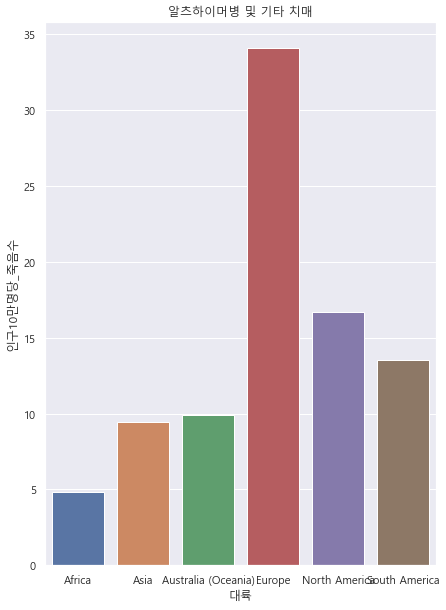

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')
sns.set({'figure.figsize':(7,10)})
plt.rcParams['font.family'] ='Malgun Gothic'
column_num = 4
factor_name = death.columns[column_num]
continent_factor = death_melted_factor_per100000[death_melted_factor_per100000['variable']==death.columns[column_num]]
sns.barplot(x=continent_factor['대륙'],y= continent_factor['인구10만명당_죽음수'])
plt.title('%s'%factor_name)

In [ ]:
pd.to_pickle(death_melted_factor_per100000, 'dataframe.pickle')

In [ ]:
import sqlalchemy as sql

In [ ]:
pd.read_pickle('dataframe.pickle').to_json('dataframe.json', orient='columns')

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_json('dataframe.json')
df.to_csv('data.csv')
df.iloc[1,0]
df

,대륙,variable,인구10만명당_죽음수
0,Africa,HIV/AIDS,91.569522
1,Africa,간경화 및 기타 만성 간 질환,14.639554
2,Africa,결핵,39.082130
3,Africa,교통사고,16.642210
4,Africa,급성 간염,1.579334
...,...,...,...
181,South America,중독,0.418801
182,South America,진성 당뇨병,21.436924
183,South America,파킨슨 병,3.205111
184,South America,하부 호흡기 감염,32.083231


In [ ]:
list(df['대륙'].unique())

['Africa',
 'Asia',
 'Australia (Oceania)',
 'Europe',
 'North America',
 'South America']